In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import np_utils
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
import tensorflow as tf
from keras.models import load_model
from tqdm import tqdm

Using TensorFlow backend.


In [3]:
# defining the path and classes.
directory = f'state-farm-distracted-driver-detection\\imgs\\train'
test_directory = f'state-farm-distracted-driver-detection\\imgs\\test'
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

In [4]:
def generate_path(*args,**kwargs):
    import os
    path_conv = ""
    for i in range(len(args)):
        
        if len(args) == 1 :
            path_conv = os.path.join(path_conv,args[i])     
            return path_conv
        elif i == (len(args) - 1):
            return path_conv
        
        path_conv = os.path.join(path_conv,args[i],args[i+1])

In [5]:
# provide the path and number of images to be displayed.
# function plots those images.
def display_images(path,no_of_images):
    count = 1
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        count += 1
        if(no_of_images < count):
            break

In [6]:
# defining a shape to be used for our models.
img_size1 = 240
img_size2 = 240

In [7]:
class train_and_test:
    def __init__(self,*args,**kwargs):
        self.train_and_test = args
        
    # creating a training dataset.
    def create_training_data(self,path,classes,img_size1,img_size2):
            training_data = []
            for img in tqdm(os.listdir(path)):
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_img = cv2.resize(img_array,(img_size2,img_size1))
                if classes == 'c0':
                    training_data.append([new_img,0])
                elif classes == 'c1' :               
                    training_data.append([new_img,1])
                elif classes == 'c2' :               
                    training_data.append([new_img,1])
                elif classes == 'c3' :               
                    training_data.append([new_img,1])
                elif classes == 'c4' :               
                    training_data.append([new_img,1])
                elif classes == 'c5' :               
                    training_data.append([new_img,1])
                elif classes == 'c6' :               
                    training_data.append([new_img,1])
                elif classes == 'c7' :               
                    training_data.append([new_img,1])
                elif classes == 'c8' :               
                    training_data.append([new_img,1])
                elif classes == 'c9' :               
                    training_data.append([new_img,1])
            return training_data
        
    # Creating a test dataset.    
    def create_testing_data(self,path,img_size1,img_size2):
        testing_data = []       
        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img_array,(img_size2,img_size1))
            testing_data.append([img,new_img])
        return testing_data

In [8]:
# Initializing the train and test classes for training and validation.
_train_ = train_and_test()
_test_ = train_and_test()

In [8]:
training_data_c0 = _train_.create_training_data(generate_path(directory,classes[0]),classes[0],img_size1,img_size2)
training_data_c1 = _train_.create_training_data(generate_path(directory,classes[1]),classes[1],img_size1,img_size2)
training_data_c2 = _train_.create_training_data(generate_path(directory,classes[2]),classes[2],img_size1,img_size2)
training_data_c3 = _train_.create_training_data(generate_path(directory,classes[3]),classes[3],img_size1,img_size2)
training_data_c4 = _train_.create_training_data(generate_path(directory,classes[4]),classes[4],img_size1,img_size2)
training_data_c5 = _train_.create_training_data(generate_path(directory,classes[5]),classes[5],img_size1,img_size2)
training_data_c6 = _train_.create_training_data(generate_path(directory,classes[6]),classes[6],img_size1,img_size2)
training_data_c7 = _train_.create_training_data(generate_path(directory,classes[7]),classes[7],img_size1,img_size2)
training_data_c8 = _train_.create_training_data(generate_path(directory,classes[8]),classes[8],img_size1,img_size2)
training_data_c9 = _train_.create_training_data(generate_path(directory,classes[9]),classes[9],img_size1,img_size2)

100%|██████████| 2129/2129 [00:08<00:00, 243.67it/s]


In [9]:
test_data = _test_.create_testing_data(generate_path(test_directory),img_size1,img_size2)

100%|██████████| 79726/79726 [05:14<00:00, 253.73it/s]


In [10]:
# create train and test data for our model.
class features_and_labels:
    # get all the arguments dynmically.
    def __init__(self,*args,**kwargs):
        self.features_and_labels = args
        
    # generate your features and labels.
    def generate_features_and_label(self,_class1_,_class2_):
        x = []
        y = []
        
        for features, label in tqdm(_class1_):
            x.append(features)
            y.append(label)
            
        for features, label in tqdm(_class2_):
            x.append(features)
            y.append(label)
            
        return x,y
    
    # generate np_arrays for test.
    def generate_npArray(self,_class1_,_class2_,img_size2,img_size1) :
        x,y = self.generate_features_and_label(_class1_,_class2_)
        np_array = np.array(x).reshape(-1,img_size2*img_size1)
        return np_array, y
    
    # train and split your data.
    def train_and_split(self,features,labels,test_size,random_state,num_class):
        x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=test_size,random_state=random_state)
        Y_train = np_utils.to_categorical(y_train,num_classes=num_class)
        Y_test = np_utils.to_categorical(y_test,num_classes=num_class)
        
        return x_train,x_test,Y_train,Y_test
    

## Different Distraction type
    c0: safe driving
    c1: texting - right
    c2: talking on the phone - right
    c3: texting - left
    c4: talking on the phone - left
    c5: operating the radio
    c6: drinking
    c7: reaching behind
    c8: hair and makeup
    c9: talking to passenger


## Creating training data for Safe vs texting_right

In [11]:
feature_label = features_and_labels()

np_array_c0c1,y_c0c1 = feature_label.generate_npArray(training_data_c0,training_data_c1,img_size2,img_size1)
x_train_c0c1,x_test_c0c1,y_train_c0c1,y_test_c0c1 = feature_label.train_and_split(np_array_c0c1,y_c0c1,0.3,100,2)

100%|██████████| 2267/2267 [00:00<00:00, 971741.15it/s]


In [12]:
# initializing the logistic regression classifier.
output_dim = nb_classes = 2
batch_size = 128 
nb_epoch = 100
model_c0c1 = Sequential() 
model_c0c1.add(BatchNormalization())
model_c0c1.add(Dense(output_dim, input_dim=240*240, activation='softmax')) 
model_c0c1.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
callbacks = [EarlyStopping(monitor='val_acc',patience=5,mode='max')]
history_c0c1 = model_c0c1.fit(x_train_c0c1, y_train_c0c1, batch_size=batch_size, epochs=nb_epoch,verbose=1, validation_data=(x_test_c0c1, y_test_c0c1),callbacks=callbacks) 

Train on 3329 samples, validate on 1427 samples
Epoch 1/100
3329/3329 [==============================] - 5s 1ms/step - loss: 2.7977 - acc: 0.7474 - val_loss: 1.1492 - val_acc: 0.8963
Epoch 2/100
3329/3329 [==============================] - 4s 1ms/step - loss: 0.8651 - acc: 0.9231 - val_loss: 1.0053 - val_acc: 0.9152
Epoch 3/100
3329/3329 [==============================] - 4s 1ms/step - loss: 0.4854 - acc: 0.9555 - val_loss: 0.3915 - val_acc: 0.9650
Epoch 4/100
3329/3329 [==============================] - 4s 1ms/step - loss: 0.2425 - acc: 0.9739 - val_loss: 0.2827 - val_acc: 0.9650
Epoch 5/100
3329/3329 [==============================] - 4s 1ms/step - loss: 0.1651 - acc: 0.9784 - val_loss: 0.0619 - val_acc: 0.9902
Epoch 6/100
3329/3329 [==============================] - 4s 1ms/step - loss: 0.0796 - acc: 0.9913 - val_loss: 0.0821 - val_acc: 0.9888
Epoch 7/100
3329/3329 [==============================] - 4s 1ms/step - loss: 0.0825 - acc: 0.9889 - val_loss: 0.0898 - val_acc: 0.9853
Epoch 8

In [13]:
model_c0c1.save_weights('./driverdistraction_Safe_vs_texting_right_weights.h5', overwrite=True)
model_c0c1.save('./driverdistraction_lr_Safe_vs_texting_right.h5')

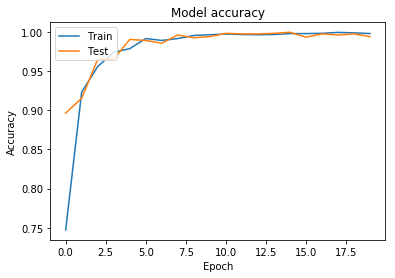

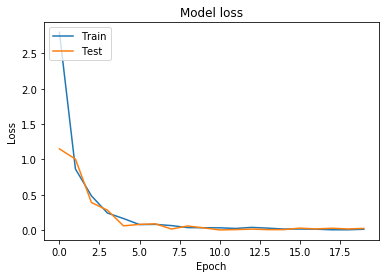

In [14]:
# Plot training & validation accuracy values
plt.plot(history_c0c1.history['acc'])
plt.plot(history_c0c1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_c0c1.history['loss'])
plt.plot(history_c0c1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Creating training data for Safe vs talking_on_the_phone_right

In [15]:
np_array_c0c2, y_c0c2 = feature_label.generate_npArray(training_data_c0,training_data_c2,img_size2,img_size1)
x_train_c0c2,x_test_c0c2,y_train_c0c2,y_test_c0c2 = feature_label.train_and_split(np_array_c0c2,y_c0c2,0.3,100,2)

100%|██████████| 2317/2317 [00:00<00:00, 1367990.20it/s]


In [16]:
# initializing the logistic regression classifier.
output_dim = nb_classes = 2
batch_size = 128 
nb_epoch = 25
model_c0c2 = Sequential() 
model_c0c2.add(BatchNormalization())
model_c0c2.add(Dense(output_dim, input_dim=240*240, activation='softmax')) 
model_c0c2.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
callbacks = [EarlyStopping(monitor='val_acc',patience=5,mode='max')]
history_c0c2 = model_c0c2.fit(x_train_c0c2, y_train_c0c2, batch_size=batch_size, epochs=nb_epoch,verbose=1, validation_data=(x_test_c0c2, y_test_c0c2),callbacks=callbacks) 

Train on 3364 samples, validate on 1442 samples
Epoch 1/25
3364/3364 [==============================] - 4s 1ms/step - loss: 4.7549 - acc: 0.6680 - val_loss: 4.2994 - val_acc: 0.7309
Epoch 2/25
3364/3364 [==============================] - 4s 1ms/step - loss: 3.6626 - acc: 0.7598 - val_loss: 2.3480 - val_acc: 0.8350
Epoch 3/25
3364/3364 [==============================] - 4s 1ms/step - loss: 1.3888 - acc: 0.8912 - val_loss: 0.4039 - val_acc: 0.9605
Epoch 4/25
3364/3364 [==============================] - 4s 1ms/step - loss: 0.5490 - acc: 0.9510 - val_loss: 0.3946 - val_acc: 0.9653
Epoch 5/25
3364/3364 [==============================] - 4s 1ms/step - loss: 0.3056 - acc: 0.9706 - val_loss: 0.1517 - val_acc: 0.9861
Epoch 6/25
3364/3364 [==============================] - 4s 1ms/step - loss: 0.1997 - acc: 0.9810 - val_loss: 0.0673 - val_acc: 0.9917
Epoch 7/25
3364/3364 [==============================] - 4s 1ms/step - loss: 0.1189 - acc: 0.9875 - val_loss: 0.0671 - val_acc: 0.9910
Epoch 8/25
336

In [17]:
model_c0c2.save_weights('./driverdistraction_talking_on_the_phone_right_weights.h5', overwrite=True)
model_c0c2.save('./driverdistraction_lr_talking_on_the_phone_right.h5')

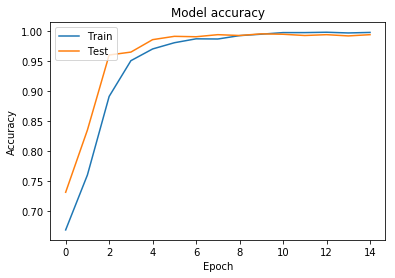

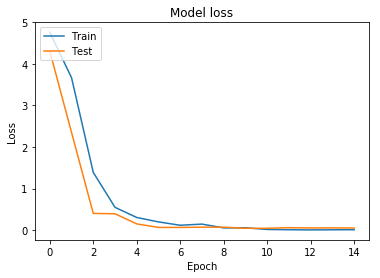

In [18]:
# Plot training & validation accuracy values
plt.plot(history_c0c2.history['acc'])
plt.plot(history_c0c2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_c0c2.history['loss'])
plt.plot(history_c0c2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Creating training data for Safe vs texting_left

In [19]:
np_array_c0c3, y_c0c3 = feature_label.generate_npArray(training_data_c0,training_data_c3,img_size2,img_size1)
x_train_c0c3,x_test_c0c3,y_train_c0c3,y_test_c0c3 = feature_label.train_and_split(np_array_c0c3,y_c0c3,0.3,100,2)

100%|██████████| 2346/2346 [00:00<00:00, 916783.49it/s]


In [20]:
# initializing the logistic regression classifier.
output_dim = nb_classes = 2
batch_size = 128 
nb_epoch = 25
model_c0c3 = Sequential() 
model_c0c3.add(BatchNormalization())
model_c0c3.add(Dense(output_dim, input_dim=240*240, activation='softmax')) 
model_c0c3.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
callbacks = [EarlyStopping(monitor='val_acc',patience=5,mode='max')]
history_c0c3 = model_c0c3.fit(x_train_c0c3, y_train_c0c3, batch_size=batch_size, epochs=nb_epoch,verbose=1, validation_data=(x_test_c0c3, y_test_c0c3),callbacks=callbacks) 

Train on 3384 samples, validate on 1451 samples
Epoch 1/25
3384/3384 [==============================] - 5s 1ms/step - loss: 2.3826 - acc: 0.7807 - val_loss: 0.7838 - val_acc: 0.9345
Epoch 2/25
3384/3384 [==============================] - 4s 1ms/step - loss: 0.7213 - acc: 0.9418 - val_loss: 0.4377 - val_acc: 0.9428
Epoch 3/25
3384/3384 [==============================] - 4s 1ms/step - loss: 0.2493 - acc: 0.9678 - val_loss: 0.2399 - val_acc: 0.9759
Epoch 4/25
3384/3384 [==============================] - 4s 1ms/step - loss: 0.1132 - acc: 0.9849 - val_loss: 0.1346 - val_acc: 0.9828
Epoch 5/25
3384/3384 [==============================] - 4s 1ms/step - loss: 0.0674 - acc: 0.9905 - val_loss: 0.1260 - val_acc: 0.9841
Epoch 6/25
3384/3384 [==============================] - 4s 1ms/step - loss: 0.0563 - acc: 0.9897 - val_loss: 0.0805 - val_acc: 0.9904
Epoch 7/25
3384/3384 [==============================] - 4s 1ms/step - loss: 0.0240 - acc: 0.9959 - val_loss: 0.0380 - val_acc: 0.9931
Epoch 8/25
338

In [21]:
model_c0c3.save_weights('./driverdistraction_Safe_texting_left_weights.h5', overwrite=True)
model_c0c3.save('./driverdistraction_lr_Safe_texting_left.h5')

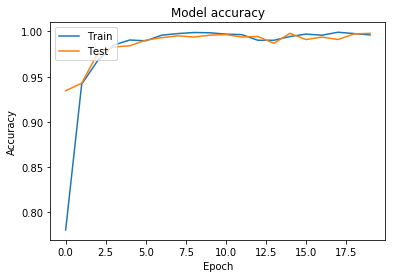

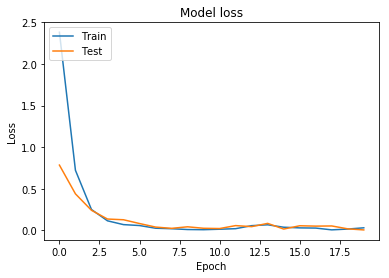

In [22]:
# Plot training & validation accuracy values
plt.plot(history_c0c3.history['acc'])
plt.plot(history_c0c3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_c0c3.history['loss'])
plt.plot(history_c0c3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Creating training data for Safe vs talking_on_the_phone_left

In [23]:
np_array_c0c4, y_c0c4 = feature_label.generate_npArray(training_data_c0,training_data_c4,img_size2,img_size1)
x_train_c0c4,x_test_c0c4,y_train_c0c4,y_test_c0c4 = feature_label.train_and_split(np_array_c0c4,y_c0c4,0.3,100,2)

100%|██████████| 2326/2326 [00:00<00:00, 846429.91it/s]


In [24]:
# initializing the logistic regression classifier.
output_dim = nb_classes = 2
batch_size = 128 
nb_epoch = 25
model_c0c4 = Sequential() 
model_c0c4.add(BatchNormalization())
model_c0c4.add(Dense(output_dim, input_dim=240*240, activation='softmax')) 
model_c0c4.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
callbacks = [EarlyStopping(monitor='val_acc',patience=5,mode='max')]
history_c0c4 = model_c0c4.fit(x_train_c0c4, y_train_c0c4, batch_size=batch_size, epochs=nb_epoch,verbose=1, validation_data=(x_test_c0c4, y_test_c0c4),callbacks=callbacks) 

Train on 3370 samples, validate on 1445 samples
Epoch 1/25
3370/3370 [==============================] - 4s 1ms/step - loss: 3.2296 - acc: 0.7323 - val_loss: 2.3073 - val_acc: 0.8187
Epoch 2/25
3370/3370 [==============================] - 4s 1ms/step - loss: 1.7628 - acc: 0.8715 - val_loss: 1.7660 - val_acc: 0.8775
Epoch 3/25
3370/3370 [==============================] - 4s 1ms/step - loss: 0.9731 - acc: 0.9202 - val_loss: 0.3650 - val_acc: 0.9516
Epoch 4/25
3370/3370 [==============================] - 4s 1ms/step - loss: 0.1946 - acc: 0.9757 - val_loss: 0.0982 - val_acc: 0.9848
Epoch 5/25
3370/3370 [==============================] - 4s 1ms/step - loss: 0.0861 - acc: 0.9881 - val_loss: 0.0546 - val_acc: 0.9903
Epoch 6/25
3370/3370 [==============================] - 4s 1ms/step - loss: 0.0521 - acc: 0.9923 - val_loss: 0.0305 - val_acc: 0.9958
Epoch 7/25
3370/3370 [==============================] - 4s 1ms/step - loss: 0.0214 - acc: 0.9953 - val_loss: 0.0409 - val_acc: 0.9958
Epoch 8/25
337

In [25]:
model_c0c4.save_weights('./driverdistraction_talking_on_the_phone_left_weights.h5', overwrite=True)
model_c0c4.save('./driverdistraction_lr_talking_on_the_phone_left.h5')

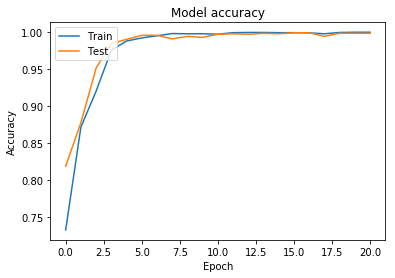

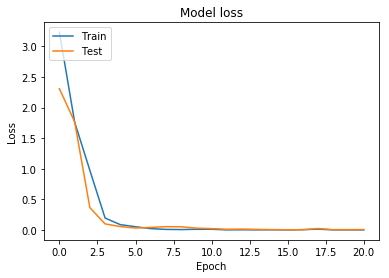

In [26]:
# Plot training & validation accuracy values
plt.plot(history_c0c4.history['acc'])
plt.plot(history_c0c4.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_c0c4.history['loss'])
plt.plot(history_c0c4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Creating training data for Safe vs operating_the_radio

In [27]:
np_array_c0c5, y_c0c5 = feature_label.generate_npArray(training_data_c0,training_data_c5,img_size2,img_size1)
x_train_c0c5,x_test_c0c5,y_train_c0c5,y_test_c0c5 = feature_label.train_and_split(np_array_c0c5,y_c0c5,0.3,100,2)

100%|██████████| 2312/2312 [00:00<00:00, 1224707.10it/s]


In [28]:
# initializing the logistic regression classifier.
output_dim = nb_classes = 2
batch_size = 128 
nb_epoch = 25
model_c0c5 = Sequential() 
model_c0c5.add(BatchNormalization())
model_c0c5.add(Dense(output_dim, input_dim=240*240, activation='softmax')) 
model_c0c5.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
callbacks = [EarlyStopping(monitor='val_acc',patience=5,mode='max')]
history_c0c5 = model_c0c5.fit(x_train_c0c5, y_train_c0c5, batch_size=batch_size, epochs=nb_epoch,verbose=1, validation_data=(x_test_c0c5, y_test_c0c5),callbacks=callbacks) 

Train on 3360 samples, validate on 1441 samples
Epoch 1/25
3360/3360 [==============================] - 3s 947us/step - loss: 3.4574 - acc: 0.7390 - val_loss: 0.9274 - val_acc: 0.9216
Epoch 2/25
3360/3360 [==============================] - 3s 767us/step - loss: 0.5184 - acc: 0.9539 - val_loss: 0.2551 - val_acc: 0.9771
Epoch 3/25
3360/3360 [==============================] - 3s 774us/step - loss: 0.1738 - acc: 0.9818 - val_loss: 0.1792 - val_acc: 0.9868
Epoch 4/25
3360/3360 [==============================] - 3s 779us/step - loss: 0.0711 - acc: 0.9932 - val_loss: 0.1335 - val_acc: 0.9882
Epoch 5/25
3360/3360 [==============================] - 3s 790us/step - loss: 0.0628 - acc: 0.9938 - val_loss: 0.1326 - val_acc: 0.9868
Epoch 6/25
3360/3360 [==============================] - 3s 769us/step - loss: 0.0752 - acc: 0.9938 - val_loss: 0.1169 - val_acc: 0.9917
Epoch 7/25
3360/3360 [==============================] - 3s 770us/step - loss: 0.0461 - acc: 0.9967 - val_loss: 0.0893 - val_acc: 0.9938


In [29]:
model_c0c5.save_weights('./driverdistraction_operating_the_radio_weights.h5', overwrite=True)
model_c0c5.save('./driverdistraction_lr_operating_the_radio.h5')

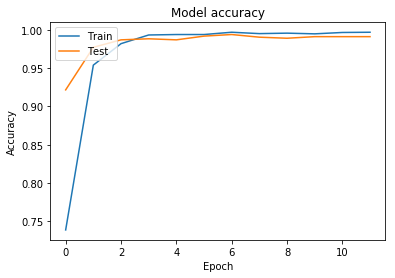

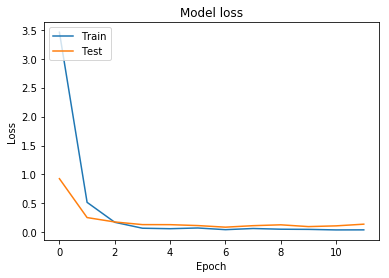

In [30]:
# Plot training & validation accuracy values
plt.plot(history_c0c5.history['acc'])
plt.plot(history_c0c5.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_c0c5.history['loss'])
plt.plot(history_c0c5.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Creating training data for Safe vs drinking

In [31]:
np_array_c0c6, y_c0c6 = feature_label.generate_npArray(training_data_c0,training_data_c6,img_size2,img_size1)
x_train_c0c6,x_test_c0c6,y_train_c0c6,y_test_c0c6 = feature_label.train_and_split(np_array_c0c6,y_c0c6,0.3,100,2)

100%|██████████| 2325/2325 [00:00<00:00, 843504.61it/s]


In [32]:
# initializing the logistic regression classifier.
output_dim = nb_classes = 2
batch_size = 128 
nb_epoch = 30
model_c0c6 = Sequential() 
model_c0c6.add(BatchNormalization())
model_c0c6.add(Dense(output_dim, input_dim=240*240, activation='softmax')) 
model_c0c6.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
callbacks = [EarlyStopping(monitor='val_acc',patience=5,mode='max')]
history_c0c6 = model_c0c6.fit(x_train_c0c6, y_train_c0c6, batch_size=batch_size, epochs=nb_epoch,verbose=1, validation_data=(x_test_c0c6, y_test_c0c6),callbacks=callbacks) 

Train on 3369 samples, validate on 1445 samples
Epoch 1/30
3369/3369 [==============================] - 3s 939us/step - loss: 3.9612 - acc: 0.7159 - val_loss: 3.4849 - val_acc: 0.7779
Epoch 2/30
3369/3369 [==============================] - 3s 769us/step - loss: 3.0801 - acc: 0.7999 - val_loss: 2.2505 - val_acc: 0.8443
Epoch 3/30
3369/3369 [==============================] - 3s 784us/step - loss: 1.5041 - acc: 0.8884 - val_loss: 0.5897 - val_acc: 0.9481
Epoch 4/30
3369/3369 [==============================] - 3s 770us/step - loss: 0.3948 - acc: 0.9647 - val_loss: 0.2368 - val_acc: 0.9806
Epoch 5/30
3369/3369 [==============================] - 3s 768us/step - loss: 0.1668 - acc: 0.9822 - val_loss: 0.0448 - val_acc: 0.9945
Epoch 6/30
3369/3369 [==============================] - 3s 786us/step - loss: 0.1024 - acc: 0.9905 - val_loss: 0.1008 - val_acc: 0.9896
Epoch 7/30
3369/3369 [==============================] - 3s 773us/step - loss: 0.0872 - acc: 0.9923 - val_loss: 0.0801 - val_acc: 0.9938


In [33]:
model_c0c6.save_weights('./driverdistraction_drinking_weights.h5', overwrite=True)
model_c0c6.save('./driverdistraction_lr_drinking.h5')

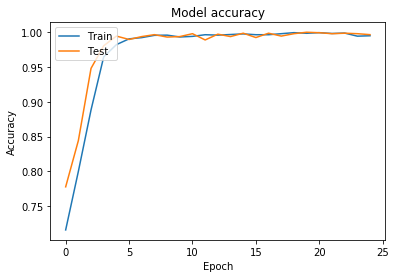

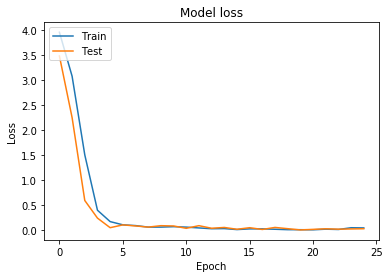

In [34]:
# Plot training & validation accuracy values
plt.plot(history_c0c6.history['acc'])
plt.plot(history_c0c6.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_c0c6.history['loss'])
plt.plot(history_c0c6.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Creating training data for Safe vs reach_behind

In [35]:
np_array_c0c7, y_c0c7 = feature_label.generate_npArray(training_data_c0,training_data_c7,img_size2,img_size1)
x_train_c0c7,x_test_c0c7,y_train_c0c7,y_test_c0c7 = feature_label.train_and_split(np_array_c0c7,y_c0c7,0.3,100,2)

100%|██████████| 2002/2002 [00:00<00:00, 887537.96it/s]


In [36]:
# initializing the logistic regression classifier.
output_dim = nb_classes = 2
batch_size = 128 
nb_epoch = 30
model_c0c7 = Sequential() 
model_c0c7.add(BatchNormalization())
model_c0c7.add(Dense(output_dim, input_dim=240*240, activation='softmax')) 
model_c0c7.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
callbacks = [EarlyStopping(monitor='val_acc',patience=5,mode='max')]
history_c0c7 = model_c0c7.fit(x_train_c0c7, y_train_c0c7, batch_size=batch_size, epochs=nb_epoch,verbose=1, validation_data=(x_test_c0c7, y_test_c0c7),callbacks=callbacks) 

Train on 3143 samples, validate on 1348 samples
Epoch 1/30
3143/3143 [==============================] - 3s 1ms/step - loss: 1.1231 - acc: 0.8816 - val_loss: 0.4261 - val_acc: 0.9599
Epoch 2/30
3143/3143 [==============================] - 3s 853us/step - loss: 0.2002 - acc: 0.9774 - val_loss: 0.0790 - val_acc: 0.9918
Epoch 3/30
3143/3143 [==============================] - 3s 849us/step - loss: 0.0666 - acc: 0.9917 - val_loss: 0.0417 - val_acc: 0.9933
Epoch 4/30
3143/3143 [==============================] - 3s 841us/step - loss: 0.0279 - acc: 0.9971 - val_loss: 0.0216 - val_acc: 0.9970
Epoch 5/30
3143/3143 [==============================] - 3s 839us/step - loss: 0.0437 - acc: 0.9949 - val_loss: 0.0345 - val_acc: 0.9970
Epoch 6/30
3143/3143 [==============================] - 3s 841us/step - loss: 0.0358 - acc: 0.9962 - val_loss: 0.0236 - val_acc: 0.9970
Epoch 7/30
3143/3143 [==============================] - 3s 835us/step - loss: 0.0240 - acc: 0.9968 - val_loss: 0.0301 - val_acc: 0.9970
Ep

In [37]:
model_c0c7.save_weights('./driverdistraction_reach_behind_weights.h5', overwrite=True)
model_c0c7.save('./driverdistraction_lr_reach_behind.h5')

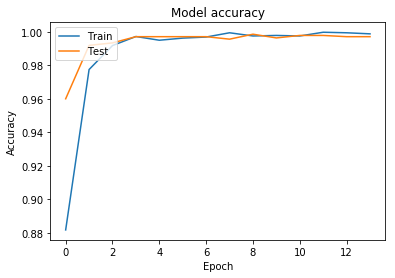

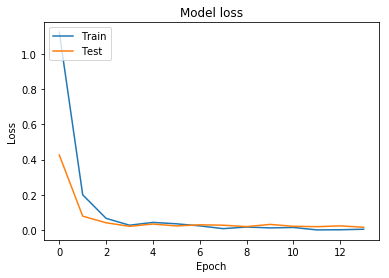

In [38]:
# Plot training & validation accuracy values
plt.plot(history_c0c7.history['acc'])
plt.plot(history_c0c7.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_c0c7.history['loss'])
plt.plot(history_c0c7.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Creating training data for Safe vs hair_and_makeup

In [39]:
np_array_c0c8, y_c0c8 = feature_label.generate_npArray(training_data_c0,training_data_c8,img_size2,img_size1)
x_train_c0c8,x_test_c0c8,y_train_c0c8,y_test_c0c8 = feature_label.train_and_split(np_array_c0c8,y_c0c8,0.3,100,2)

100%|██████████| 1911/1911 [00:00<00:00, 990645.77it/s]


In [40]:
# initializing the logistic regression classifier.
output_dim = nb_classes = 2
batch_size = 128 
nb_epoch = 30
model_c0c8 = Sequential() 
model_c0c8.add(BatchNormalization())
model_c0c8.add(Dense(output_dim, input_dim=240*240, activation='softmax')) 
model_c0c8.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
callbacks = [EarlyStopping(monitor='val_acc',patience=5,mode='max')]
history_c0c8 = model_c0c8.fit(x_train_c0c8, y_train_c0c8, batch_size=batch_size, epochs=nb_epoch,verbose=1, validation_data=(x_test_c0c8, y_test_c0c8),callbacks=callbacks) 

Train on 3080 samples, validate on 1320 samples
Epoch 1/30
3080/3080 [==============================] - 4s 1ms/step - loss: 2.4482 - acc: 0.7916 - val_loss: 1.7902 - val_acc: 0.8773
Epoch 2/30
3080/3080 [==============================] - 3s 1ms/step - loss: 1.6015 - acc: 0.8893 - val_loss: 1.5673 - val_acc: 0.8909
Epoch 3/30
3080/3080 [==============================] - 3s 1ms/step - loss: 0.8766 - acc: 0.9315 - val_loss: 0.6561 - val_acc: 0.9477
Epoch 4/30
3080/3080 [==============================] - 3s 1ms/step - loss: 0.7779 - acc: 0.9354 - val_loss: 0.7085 - val_acc: 0.9424
Epoch 5/30
3080/3080 [==============================] - 3s 1ms/step - loss: 0.5866 - acc: 0.9516 - val_loss: 0.3737 - val_acc: 0.9705
Epoch 6/30
3080/3080 [==============================] - 3s 1ms/step - loss: 0.5546 - acc: 0.9565 - val_loss: 0.4274 - val_acc: 0.9697
Epoch 7/30
3080/3080 [==============================] - 3s 1ms/step - loss: 0.3091 - acc: 0.9750 - val_loss: 0.1832 - val_acc: 0.9833
Epoch 8/30
308

In [41]:
model_c0c8.save_weights('./driverdistraction_hair_and_makeup_weights.h5', overwrite=True)
model_c0c8.save('./driverdistraction_lr_hair_and_makeup.h5')

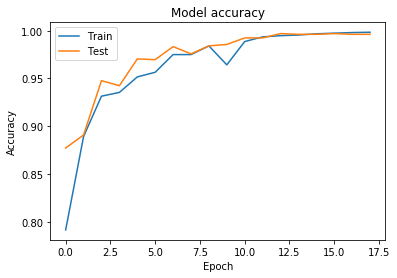

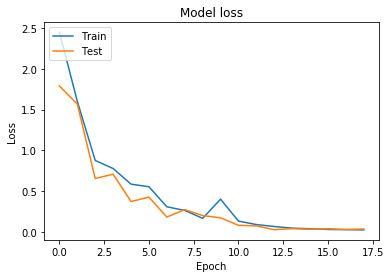

In [42]:
# Plot training & validation accuracy values
plt.plot(history_c0c8.history['acc'])
plt.plot(history_c0c8.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_c0c8.history['loss'])
plt.plot(history_c0c8.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Creating training data for Safe vs talking_to_the_passenger

In [43]:
np_array_c0c9, y_c0c9 = feature_label.generate_npArray(training_data_c0,training_data_c9,img_size2,img_size1)
x_train_c0c9,x_test_c0c9,y_train_c0c9,y_test_c0c9 = feature_label.train_and_split(np_array_c0c9,y_c0c9,0.3,100,2)

100%|██████████| 2129/2129 [00:00<00:00, 806728.09it/s]


In [44]:
# initializing the logistic regression classifier.
output_dim = nb_classes = 2
batch_size = 128 
nb_epoch = 25
model_c0c9 = Sequential() 
model_c0c9.add(BatchNormalization())
model_c0c9.add(Dense(output_dim, input_dim=240*240, activation='softmax')) 
model_c0c9.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
callbacks = [EarlyStopping(monitor='val_acc',patience=5,mode='max')]
history_c0c9 = model_c0c9.fit(x_train_c0c9, y_train_c0c9, batch_size=batch_size, epochs=nb_epoch,verbose=1, validation_data=(x_test_c0c9, y_test_c0c9),callbacks=callbacks) 

Train on 3232 samples, validate on 1386 samples
Epoch 1/25
3232/3232 [==============================] - 4s 1ms/step - loss: 3.2577 - acc: 0.7379 - val_loss: 2.0821 - val_acc: 0.8506
Epoch 2/25
3232/3232 [==============================] - 3s 1ms/step - loss: 1.3926 - acc: 0.8933 - val_loss: 0.9509 - val_acc: 0.9199
Epoch 3/25
3232/3232 [==============================] - 3s 1ms/step - loss: 0.5383 - acc: 0.9561 - val_loss: 0.4113 - val_acc: 0.9625
Epoch 4/25
3232/3232 [==============================] - 3s 1ms/step - loss: 0.4284 - acc: 0.9669 - val_loss: 0.4180 - val_acc: 0.9668
Epoch 5/25
3232/3232 [==============================] - 3s 1ms/step - loss: 0.3660 - acc: 0.9703 - val_loss: 0.1091 - val_acc: 0.9820
Epoch 6/25
3232/3232 [==============================] - 3s 1ms/step - loss: 0.1116 - acc: 0.9879 - val_loss: 0.0608 - val_acc: 0.9906
Epoch 7/25
3232/3232 [==============================] - 3s 1ms/step - loss: 0.0551 - acc: 0.9923 - val_loss: 0.0507 - val_acc: 0.9906
Epoch 8/25
323

In [45]:
model_c0c9.save_weights('./driverdistraction_talking_to_the_passenger_weights.h5', overwrite=True)
model_c0c9.save('./driverdistraction_lr_talking_to_the_passenger.h5')

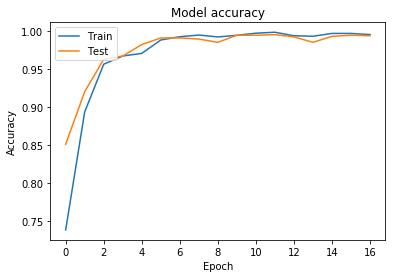

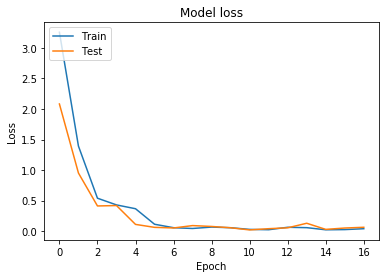

In [46]:
# Plot training & validation accuracy values
plt.plot(history_c0c9.history['acc'])
plt.plot(history_c0c9.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_c0c9.history['loss'])
plt.plot(history_c0c9.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

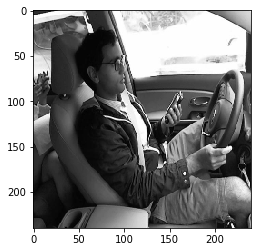

1


In [47]:
from sklearn.metrics import r2_score
test_data_ = np.array(test_data[3000][1]).reshape(-1,img_size2*img_size1)
new_img = cv2.resize(test_data[3000][1],(img_size2,img_size1))
plt.imshow(new_img,cmap='gray')
plt.show()
pred = model_c0c3.predict(test_data_)
#r2_score(y_test, pred)
print(np.argmax(pred))

In [48]:
pred

array([[6.046127e-06, 9.999939e-01]], dtype=float32)

    c0: safe driving
    c1: texting - right
    c2: talking on the phone - right
    c3: texting - left
    c4: talking on the phone - left
    c5: operating the radio
    c6: drinking
    c7: reaching behind
    c8: hair and makeup
    c9: talking to passenger